<a href="https://colab.research.google.com/github/luiscunhacsc/finance_python/blob/main/23_Hedging_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Risk Management

**Definition:** The process of identifying, assessing, and mitigating financial risks.

**Purpose:** Protect investments, ensure financial stability, and optimize returns.

**Importance:** Essential for minimizing potential losses and maximizing risk-adjusted returns.


### Identifying Financial Risks

- **Market Risk:** Risk of losses due to changes in market prices (e.g., stock prices, interest rates).
- **Credit Risk:** Risk of losses due to a borrower's failure to repay a loan or meet contractual obligations.
- **Liquidity Risk:** Risk of being unable to quickly buy or sell assets without significantly affecting their prices.
- **Operational Risk:** Risk of losses due to failures in internal processes, systems, or external events.


### Assessing Financial Risks

**Quantitative Methods:** Use statistical and mathematical models to measure risk.

**Qualitative Methods:** Use expert judgment and subjective analysis to assess risk.

**Key Metrics:**

- **Value at Risk (VaR):** Estimates potential loss over a specific time period at a given confidence level.
- **Conditional Value at Risk (CVaR):** Measures the expected loss exceeding the VaR.
- **Stress Testing:** Simulates extreme market conditions to assess potential impact on portfolios.


### Practical Example

**Scenario:** Calculate the 1-day VaR at a 95% confidence level for a stock portfolio.

**Steps:** Load historical stock price data. Calculate daily returns. Compute the VaR using the historical simulation method.



In [ ]:
%pip install -q yfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import yfinance as yf

# Define the stock tickers
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

# Download historical data
data = yf.download(tickers, start='2020-01-01', end='2023-01-01')

# Keep only the 'Adj Close' prices
adj_close_data = data['Adj Close']

# Save the data to a CSV file
adj_close_data.to_csv('historical_stock_prices.csv')

[*********************100%%**********************]  5 of 5 completed


1-day VaR (95% confidence level): -0.0348


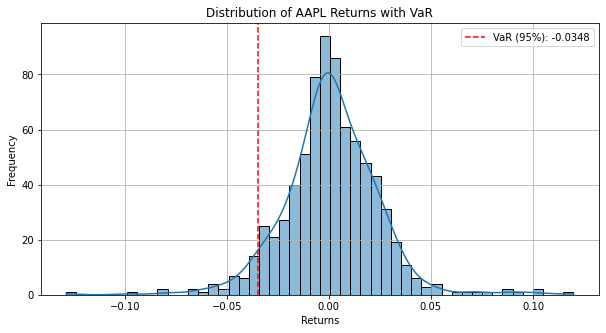

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('historical_stock_prices.csv', index_col='Date', parse_dates=True)
prices = data['AAPL']  # Adjust this to any other stock ticker if needed

# Calculate daily returns
returns = prices.pct_change().dropna()

# Calculate VaR (95% confidence level)
VaR_95 = np.percentile(returns, 5)

# Display the VaR
print(f"1-day VaR (95% confidence level): {VaR_95:.4f}")

# Visualize returns with VaR
plt.figure(figsize=(10, 5))
sns.histplot(returns, bins=50, kde=True)
plt.axvline(x=VaR_95, color='red', linestyle='--', label=f'VaR (95%): {VaR_95:.4f}')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('Distribution of AAPL Returns with VaR')
plt.legend()
plt.grid(True)
plt.show()


1-day VaR (95% confidence level): -0.0371


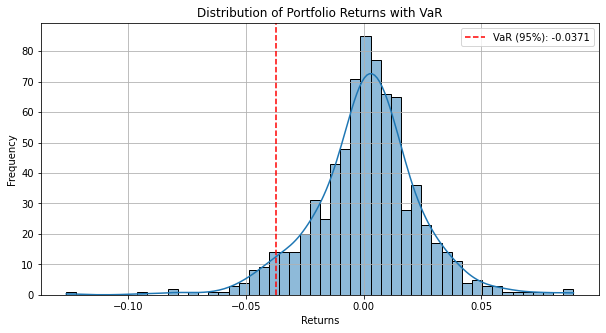

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('historical_stock_prices.csv', index_col='Date', parse_dates=True)

# Calculate daily returns for the entire portfolio (average of all stocks)
returns = data.pct_change().dropna().mean(axis=1)

# Calculate VaR (95% confidence level)
VaR_95 = np.percentile(returns, 5)

# Display the VaR
print(f"1-day VaR (95% confidence level): {VaR_95:.4f}")

# Visualize returns with VaR
plt.figure(figsize=(10, 5))
sns.histplot(returns, bins=50, kde=True)
plt.axvline(x=VaR_95, color='red', linestyle='--', label=f'VaR (95%): {VaR_95:.4f}')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('Distribution of Portfolio Returns with VaR')
plt.legend()
plt.grid(True)
plt.show()


### Hedging Techniques

**Definition:** Using financial instruments to offset potential losses in an investment.

**Instruments:**

- **Derivatives:** Options, futures, and swaps.
- **Insurance:** Policies to cover specific risks.
- **Diversification:** Spreading investments across different assets.

**Purpose:** Mitigate risk and stabilize returns.


### Practical Example

**Scenario:** Use put options to hedge against a potential decline in stock prices.

**Steps:** Determine the number of put options needed. Calculate the cost of the options. Assess the impact on the portfolio.


In [ ]:
# Example data
stock_price = 100  # Current stock price
strike_price = 95  # Strike price of the put option
option_premium = 2  # Premium of the put option
num_shares = 1000  # Number of shares in the portfolio

# Calculate the number of put options needed
num_options = num_shares / 100  # Assuming each option covers 100 shares

# Calculate the total cost of the options
total_cost = num_options * option_premium * 100

# Calculate potential payoff if stock price drops to strike price
potential_payoff = (strike_price - stock_price) * num_shares
net_cost = total_cost - potential_payoff

print(f"Total Cost of Options: ${total_cost:.2f}")
print(f"Potential Payoff if Stock Price Drops to Strike Price: ${potential_payoff:.2f}")
print(f"Net Cost: ${net_cost:.2f}")


Total Cost of Options: $2000.00
Potential Payoff if Stock Price Drops to Strike Price: $-5000.00
Net Cost: $7000.00


### Stress Testing and Scenario Analysis

**Stress Testing:** Evaluates the impact of extreme market conditions on a portfolio.

**Scenario Analysis:** Assesses the impact of specific hypothetical events on a portfolio.

**Purpose:** Identify vulnerabilities and prepare for adverse market conditions.


### Practical Example

**Scenario:** Assess the impact of a market crash on a stock portfolio.

**Steps:** Load historical stock price data. Define a stress scenario (e.g., 30% market crash). Calculate the potential impact on the portfolio.



Initial Portfolio Value: $12871.93
Portfolio Value After Stress Scenario: $9010.35
Potential Loss: $3861.58


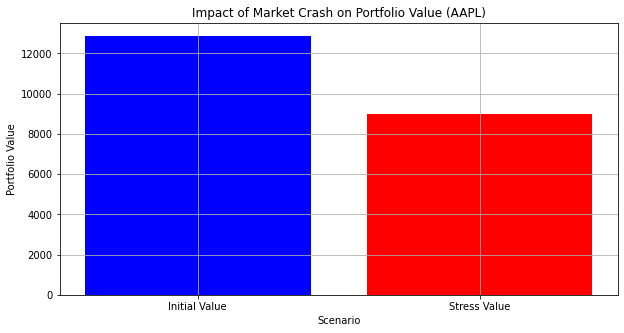

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('historical_stock_prices.csv', index_col='Date', parse_dates=True)
prices = data['AAPL']  # Adjust this to any other stock ticker if needed

# Define the number of shares in the portfolio
num_shares = 100  # Example: 100 shares

# Define a stress scenario (30% market crash)
stress_scenario = -0.30

# Calculate potential impact on the portfolio
initial_value = prices[-1] * num_shares
stress_value = initial_value * (1 + stress_scenario)
potential_loss = initial_value - stress_value

print(f"Initial Portfolio Value: ${initial_value:.2f}")
print(f"Portfolio Value After Stress Scenario: ${stress_value:.2f}")
print(f"Potential Loss: ${potential_loss:.2f}")

# Visualize the impact
plt.figure(figsize=(10, 5))
plt.bar(['Initial Value', 'Stress Value'], [initial_value, stress_value], color=['blue', 'red'])
plt.xlabel('Scenario')
plt.ylabel('Portfolio Value')
plt.title('Impact of Market Crash on Portfolio Value (AAPL)')
plt.grid(True)
plt.show()



### Explanation of Stress Test Result

In this analysis, we simulated a 30% market crash scenario and evaluated its impact on a portfolio consisting of Apple (AAPL) stock.

- **Initial Portfolio Value:** The portfolio's value before the market crash was \$12,871.93.
- **Portfolio Value After Stress Scenario:** After the market crash, the portfolio's value dropped to \$9,010.35.
- **Potential Loss:** The portfolio would incur a loss of \$3,861.58 in this scenario.

The bar chart visually represents the comparison between the initial portfolio value and the value after the stress scenario, highlighting the significant potential loss in the event of a severe market downturn.


Initial Portfolio Value: $66044.83
Portfolio Value After Stress Scenario: $46231.38
Potential Loss: $19813.45


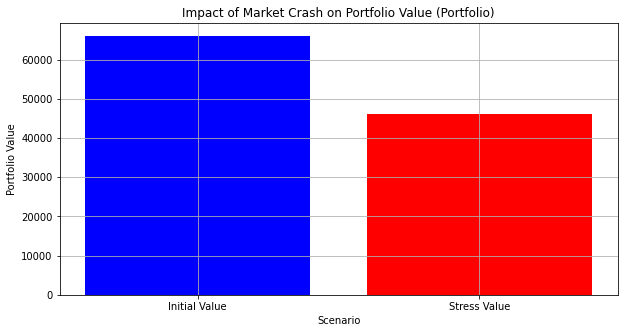

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('historical_stock_prices.csv', index_col='Date', parse_dates=True)

# Define the number of shares for each stock in the portfolio
num_shares = 100  # Example: 100 shares of each stock

# Calculate the initial portfolio value (sum of all stocks)
initial_value = (data.iloc[-1] * num_shares).sum()

# Define a stress scenario (30% market crash)
stress_scenario = -0.30

# Calculate potential impact on the portfolio
stress_value = initial_value * (1 + stress_scenario)
potential_loss = initial_value - stress_value

print(f"Initial Portfolio Value: ${initial_value:.2f}")
print(f"Portfolio Value After Stress Scenario: ${stress_value:.2f}")
print(f"Potential Loss: ${potential_loss:.2f}")

# Visualize the impact
plt.figure(figsize=(10, 5))
plt.bar(['Initial Value', 'Stress Value'], [initial_value, stress_value], color=['blue', 'red'])
plt.xlabel('Scenario')
plt.ylabel('Portfolio Value')
plt.title('Impact of Market Crash on Portfolio Value (Portfolio)')
plt.grid(True)
plt.show()


### Explanation of Stress Test Result

In this analysis, we simulated a 30% market crash scenario and evaluated its impact on a diversified portfolio.

- **Initial Portfolio Value:** The portfolio's value before the market crash was \$66,044.83.
- **Portfolio Value After Stress Scenario:** After the market crash, the portfolio's value dropped to \$46,231.38.
- **Potential Loss:** The portfolio would incur a loss of \$19,813.45 in this scenario.

The bar chart visually represents the comparison between the initial portfolio value and the value after the stress scenario, highlighting the significant potential loss in the event of a severe market downturn. This result emphasizes the importance of risk management and diversification in portfolio management.
